In [2]:
# !pip3 install pandas sqlite3 plotly

In [144]:
import pandas as pd
import sqlite3
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
import random

In [145]:
conn = sqlite3.connect('mlflow.db')

In [146]:
query = "SELECT name FROM sqlite_master WHERE type='table'"
tables = conn.execute(query).fetchall()

In [147]:
for table in tables:
    print(table[0])

experiments
alembic_version
experiment_tags
tags
registered_models
runs
registered_model_tags
model_version_tags
model_versions
latest_metrics
metrics
params
registered_model_aliases
datasets
inputs
input_tags


In [148]:
query = "SELECT * FROM latest_metrics"
df_metrics = pd.read_sql_query(query, conn)
df_metrics

,key,value,timestamp,step,is_nan,run_uuid
0,all-Precision,0.864247,1688083841863,0,0,e382fb50896542dc8bb8c25c8538999f
1,all-Recall,0.825955,1688083841879,0,0,e382fb50896542dc8bb8c25c8538999f
2,all-mAP_.5,0.798915,1688083841897,0,0,e382fb50896542dc8bb8c25c8538999f
3,all-mAP_.5_.95,0.332101,1688083841914,0,0,e382fb50896542dc8bb8c25c8538999f
4,mm-Precision,0.877313,1688083845916,0,0,e382fb50896542dc8bb8c25c8538999f
...,...,...,...,...,...,...
436,fps-i15,31.000000,1688674390372,0,0,64b6f7b983864931a88b766a90072562
437,fps-i15,5.800000,1688674390419,0,0,4bc95ef9a4bd45ecb6a1b434316c9b92
438,fps-i15,3.200000,1688674390467,0,0,2c1a00c0936f4bc0bfdac0b2d4719471
439,fps-i15,21.000000,1688674390514,0,0,5606d5a8a71b490abc0e9c5baa112871


In [149]:
query = "SELECT * FROM experiments"
df_experiments = pd.read_sql_query(query, conn)
df_experiments.head()

,experiment_id,name,artifact_location,lifecycle_stage,creation_time,last_update_time
0,0,Default,mlflow-artifacts:/0,active,1688083776834,1688083776834
1,1,object_detection,s3://elvis-s3-mlflow/mlruns/object_detection,active,1688083837587,1688083837587


In [150]:
query = "SELECT * FROM runs"
df_runs = pd.read_sql_query(query, conn)
df_runs.head()

,run_uuid,name,source_type,source_name,entry_point_name,user_id,status,start_time,end_time,source_version,lifecycle_stage,artifact_uri,experiment_id,deleted_time
0,e382fb50896542dc8bb8c25c8538999f,yolov4tiny_fp32,UNKNOWN,,,LuisGonzalez,FINISHED,1688083838136,1688674390182,,active,s3://elvis-s3-mlflow/mlruns/object_detection/e...,1,NaN
1,ed07dd096d0f461ebe88b69bd1921b9a,yolov4tiny_fp16,UNKNOWN,,,LuisGonzalez,FINISHED,1688083863927,1688674390220,,active,s3://elvis-s3-mlflow/mlruns/object_detection/e...,1,NaN
2,4c9fe99d32f0428bacaabefd9c79a643,yolov4_fp16,UNKNOWN,,,LuisGonzalez,FINISHED,1688083898581,1688084599572,,deleted,s3://elvis-s3-mlflow/mlruns/object_detection/4...,1,1.688162e+12
3,e0506657835d451a8b99c954b2be6090,yolov4_fp32,UNKNOWN,,,LuisGonzalez,FINISHED,1688083919409,1688674390260,,active,s3://elvis-s3-mlflow/mlruns/object_detection/e...,1,NaN
4,64b6f7b983864931a88b766a90072562,ssdresnet10_fp32,UNKNOWN,,,LuisGonzalez,FINISHED,1688083936493,1688674390382,,active,s3://elvis-s3-mlflow/mlruns/object_detection/6...,1,NaN


In [151]:
query = """
        SELECT m.key, m.value, r.name as model FROM latest_metrics as m left join runs as r on m.run_uuid = r.run_uuid
        """
df_metrics = pd.read_sql_query(query, conn)
df_metrics.drop_duplicates(['key', 'value', 'model'], inplace=True)
df_metrics = df_metrics.pivot(index='model', columns='key', values='value')
df_metrics.reset_index(inplace=True)
df_metrics.head()

key,model,all-Precision,all-Recall,all-mAP_.5,all-mAP_.5_.95,coca-cola-Precision,coca-cola-Recall,coca-cola-mAP_.5,coca-cola-mAP_.5_.95,doritos-Precision,...,pytorch-mm-mAP_.5,pytorch-mm-mAP_.5_.95,pytorch-person-Precision,pytorch-person-Recall,pytorch-person-mAP_.5,pytorch-person-mAP_.5_.95,pytorch-pringles-Precision,pytorch-pringles-Recall,pytorch-pringles-mAP_.5,pytorch-pringles-mAP_.5_.95
0,ssdresnet10_fp16,0.747442,0.635158,0.568361,0.179143,0.721053,0.638199,0.501333,0.094064,0.813743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ssdresnet10_fp32,0.737579,0.627840,0.557135,0.176491,0.710526,0.628882,0.489841,0.090399,0.806942,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,yolov4_fp16,0.943524,0.912331,0.915500,0.452653,0.974757,0.982919,0.983942,0.531665,0.973234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,yolov4_fp32,0.943938,0.912469,0.916014,0.455313,0.974780,0.982919,0.983743,0.534204,0.973162,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,yolov4tiny_fp16,0.863453,0.824646,0.796966,0.330357,0.950605,0.956280,0.938683,0.413863,0.931412,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
df_metrics['all-mod-mAP_.5'] = (df_metrics['coca-cola-mAP_.5'] + df_metrics['mm-mAP_.5'] + df_metrics['pringles-mAP_.5'] + df_metrics['doritos-mAP_.5'])/4
df_metrics['all-mod-Precision'] = (df_metrics['coca-cola-Precision'] + df_metrics['mm-Precision'] + df_metrics['pringles-Precision'] + df_metrics['doritos-Precision'])/4
df_metrics['all-mod-Recall'] = (df_metrics['coca-cola-Recall'] + df_metrics['mm-Recall'] + df_metrics['pringles-Recall'] + df_metrics['doritos-Recall'])/4
df_metrics['all-mod-mAP_.5_.95'] = (df_metrics['coca-cola-mAP_.5_.95'] + df_metrics['mm-mAP_.5_.95'] + df_metrics['pringles-mAP_.5_.95'] + df_metrics['doritos-mAP_.5_.95'])/4

In [153]:
fig = px.scatter(df_metrics, x='fps', y='all-mAP_.5', color='model', text='model')
# Add axis labels
fig.update_layout(xaxis_range=[0, 30], yaxis_range=[0, 1])

# Customize text labels with annotations to prevent overlap
# fig.update_traces(texttemplate='%{text} <br> (%{y:.00,s}, %{x:.,s})', textposition='bottom left')
fig.update_traces(textposition='bottom left')

# Display the plot
fig.show()

In [12]:
# !pip install adjustText

In [13]:
# !wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine.mplstyle -P /tmp
# !wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-dawn.mplstyle -P /tmp
# !wget https://raw.githubusercontent.com/h4pZ/rose-pine-matplotlib/main/themes/rose-pine-moon.mplstyle -P /tmp

In [154]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [155]:
color_dict = {
    "ssdresnet10_fp16": "#e60049", 
    "ssdresnet10_fp32": "#0bb4ff",
    "yolov4_fp16": "#50e991",
    "yolov4_fp32": "#e6d800",
    "yolov4tiny_fp16": "#9b19f5",
    "yolov4tiny_fp32": "#ffa300",
    "yolov7_fp16": "#dc0ab4",
    "yolov7_fp32": "#b3d4ff",
    "yolov7tiny_fp16": "#00bfa0",
    "yolov7tiny_fp32": "#7c1158"
}

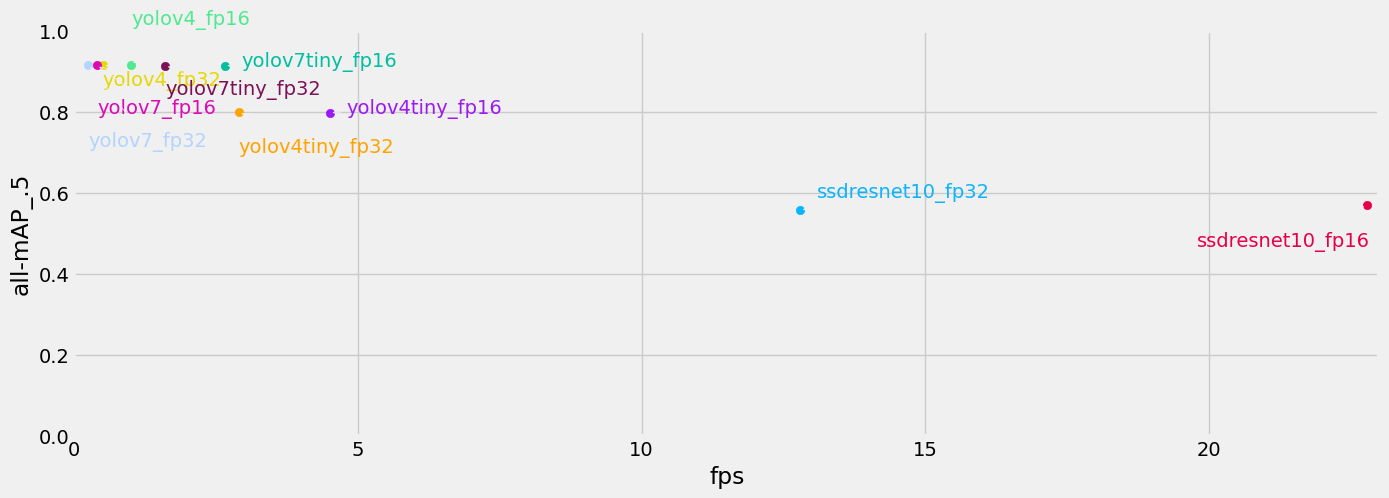

In [156]:
with plt.style.context('fivethirtyeight'):
    # Set the figure size
    plt.figure(figsize=(15, 5))  # Width, height in inches

    # plt.scatter(df_metrics['fps'], df_metrics['all-mAP_.5'])

    # Add labels to specific positions
    def add_point(model, idx, px, py, fontsize=14):
        plt.annotate(model, xy=(df_metrics['fps'][idx], df_metrics['all-mAP_.5'][idx]), xytext=(df_metrics['fps'][idx] + px, df_metrics['all-mAP_.5'][idx] + py),
                     arrowprops=dict(arrowstyle="->"), color=color_dict[model], fontsize=fontsize)
        plt.scatter(df_metrics['fps'][idx], df_metrics['all-mAP_.5'][idx], color=color_dict[model])
    
    add_point(model='ssdresnet10_fp16', idx=0, px=-3, py=-0.1)
    add_point(model='ssdresnet10_fp32', idx=1, px=0.3, py=0.03)
    add_point(model='yolov4_fp16', idx=2, px=0, py=0.1)
    add_point(model='yolov4_fp32', idx=3, px=0, py=-0.05)
    add_point(model='yolov4tiny_fp16', idx=4, px=0.3, py=0)
    add_point(model='yolov4tiny_fp32', idx=5, px=0, py=-0.1)
    add_point(model='yolov7_fp16', idx=6, px=0, py=-0.12)
    add_point(model='yolov7_fp32', idx=7, px=0, py=-0.2)
    add_point(model='yolov7tiny_fp16', idx=8, px=0.3, py=0)
    add_point(model='yolov7tiny_fp32', idx=9, px=0, py=-0.07)


    # Set axis labels
    plt.xlabel('fps')
    plt.ylabel('all-mAP_.5')

    # Set the axis limits
    plt.xlim(0, 23)  # X-axis limits
    plt.ylim(0, 1)  # Y-axis limits
    
    plt.savefig('MAPmod_vs_fps.png')
    
    # Display the plot
    plt.show()

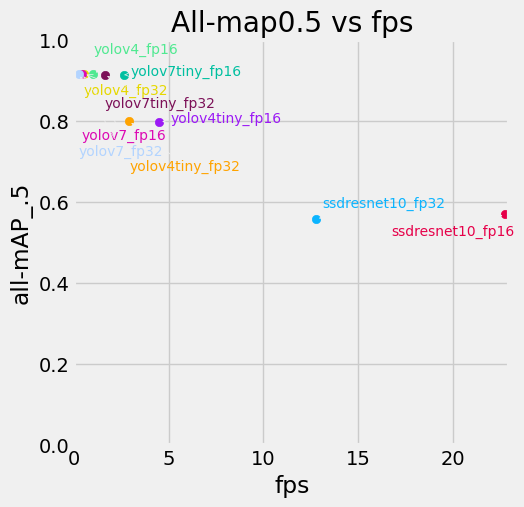

In [191]:
with plt.style.context('fivethirtyeight'):
    # Set the figure size
    plt.figure(figsize=(5, 5))  # Width, height in inches
    fontsize = 10
    add_point(model='ssdresnet10_fp16', idx=0, px=-6, py=-0.05, fontsize=fontsize)
    add_point(model='ssdresnet10_fp32', idx=1, px=0.3, py=0.03, fontsize=fontsize)
    add_point(model='yolov4_fp16', idx=2, px=0, py=0.05, fontsize=fontsize)
    add_point(model='yolov4_fp32', idx=3, px=0, py=-0.05, fontsize=fontsize)
    add_point(model='yolov4tiny_fp16', idx=4, px=0.6, py=0, fontsize=fontsize)
    add_point(model='yolov4tiny_fp32', idx=5, px=0, py=-0.12, fontsize=fontsize)
    add_point(model='yolov7_fp16', idx=6, px=0, py=-0.16, fontsize=fontsize)
    add_point(model='yolov7_fp32', idx=7, px=0, py=-0.2, fontsize=fontsize)
    add_point(model='yolov7tiny_fp16', idx=8, px=0.3, py=0, fontsize=fontsize)
    add_point(model='yolov7tiny_fp32', idx=9, px=0, py=-0.08, fontsize=fontsize)


    # Set axis labels
    plt.xlabel('fps')
    plt.ylabel('all-mAP_.5')

    # Set the axis limits
    plt.xlim(0, 23)  # X-axis limits
    plt.ylim(0, 1)  # Y-axis limits

    # Set title
    plt.title("All-map0.5 vs fps")
    plt.savefig('MAP_vs_fps.png')
    # Display the plot
    plt.show()
    

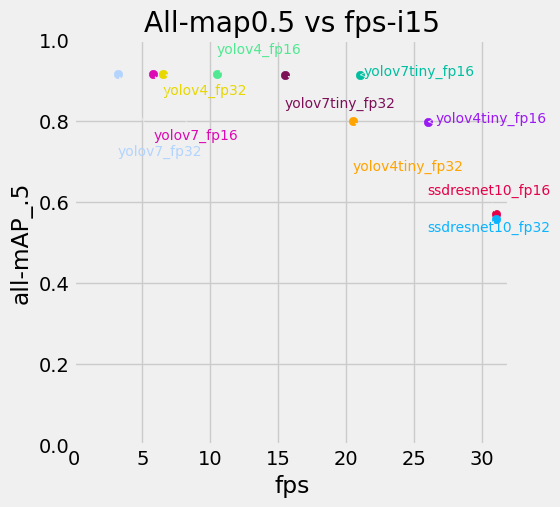

In [231]:
with plt.style.context('fivethirtyeight'):
    # Add labels to specific positions
    def add_point(model, idx, px, py, fontsize=14):
        plt.annotate(model, xy=(df_metrics['fps-i15'][idx], df_metrics['all-mAP_.5'][idx]), xytext=(df_metrics['fps-i15'][idx] + px, df_metrics['all-mAP_.5'][idx] + py),
                     arrowprops=dict(arrowstyle="->"), color=color_dict[model], fontsize=fontsize)
        plt.scatter(df_metrics['fps-i15'][idx], df_metrics['all-mAP_.5'][idx], color=color_dict[model])
        
    # Set the figure size
    plt.figure(figsize=(5, 5))  # Width, height in inches
    fontsize = 10
    add_point(model='ssdresnet10_fp16', idx=0, px=-5, py=0.05, fontsize=fontsize)
    add_point(model='ssdresnet10_fp32', idx=1, px=-5, py=-0.03, fontsize=fontsize)
    add_point(model='yolov4_fp16', idx=2, px=0, py=0.05, fontsize=fontsize)
    add_point(model='yolov4_fp32', idx=3, px=0, py=-0.05, fontsize=fontsize)
    add_point(model='yolov4tiny_fp16', idx=4, px=0.6, py=0, fontsize=fontsize)
    add_point(model='yolov4tiny_fp32', idx=5, px=0, py=-0.12, fontsize=fontsize)
    add_point(model='yolov7_fp16', idx=6, px=0, py=-0.16, fontsize=fontsize)
    add_point(model='yolov7_fp32', idx=7, px=0, py=-0.2, fontsize=fontsize)
    add_point(model='yolov7tiny_fp16', idx=8, px=0.3, py=0, fontsize=fontsize)
    add_point(model='yolov7tiny_fp32', idx=9, px=0, py=-0.08, fontsize=fontsize)


    # Set axis labels
    plt.xlabel('fps')
    plt.ylabel('all-mAP_.5')

    # Set the axis limits
    plt.xlim(0, 32)  # X-axis limits
    plt.ylim(0, 1)  # Y-axis limits

    # Set title
    plt.title("All-map0.5 vs fps-i15")
    plt.savefig('MAP_vs_fps-i15.png', bbox_inches='tight')
    # Display the plot
    plt.show()

In [177]:
def get_barplot(x, metric, plot):
    y = df_metrics[metric]
    # Sort and plot data in subplot 1
    sorted_indices1 = sorted(range(len(y)), key=lambda k: y[k], reverse=True)
    new_x = [x[i] for i in sorted_indices1]
    new_y = [y[i] for i in sorted_indices1]

    # Change bar colors
    # plot.bar(new_x, new_y)
    for i, model in enumerate(new_x):
        plot.bar(new_x[i], new_y[i], color=color_dict[model])

    # Add points labels
    plot.set_xticklabels(new_x, rotation=45, ha='right', fontsize=10)
    for i, v in enumerate(new_y):
        plot.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=10)
    plot.set_title("Models by {}".format(metric), fontsize=17)
    # plot.set_ylim(0, 1.2)

def show_subplots(category, show_fps=False):
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(2, 2, figsize=(12, 8))
        plt.subplots_adjust(wspace=0.5, hspace=0.8)

        plt.suptitle(f'Metrics by {category}', fontsize=20)

        get_barplot(df_metrics['model'], f'{category}-mAP_.5', ax[0, 0])
        get_barplot(df_metrics['model'], f'{category}-Precision', ax[0, 1])
        get_barplot(df_metrics['model'], f'{category}-Recall', ax[1, 0])
        
        if show_fps:
            get_barplot(df_metrics['model'], 'fps', ax[1, 1])
        else:
            get_barplot(df_metrics['model'], f'{category}-mAP_.5_.95', ax[1, 1])
            
def show_subplots_fps():
    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))
        plt.subplots_adjust(wspace=0.5, hspace=0.8)

        plt.suptitle(f'Models by FPS', fontsize=20)

        get_barplot(df_metrics['model'], 'fps', ax[0])
        get_barplot(df_metrics['model'], 'fps-i15', ax[1])

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



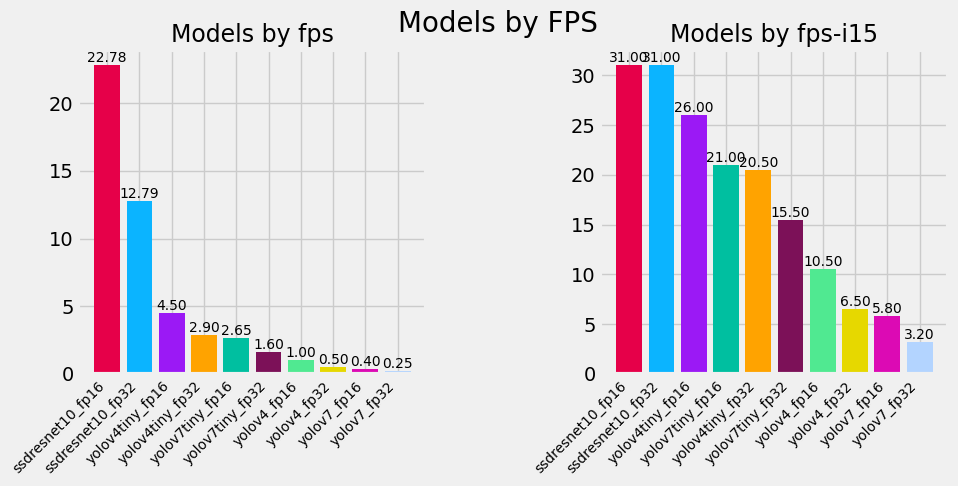

In [202]:
show_subplots_fps()
plt.savefig('models_by_fps.png', bbox_inches='tight')

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



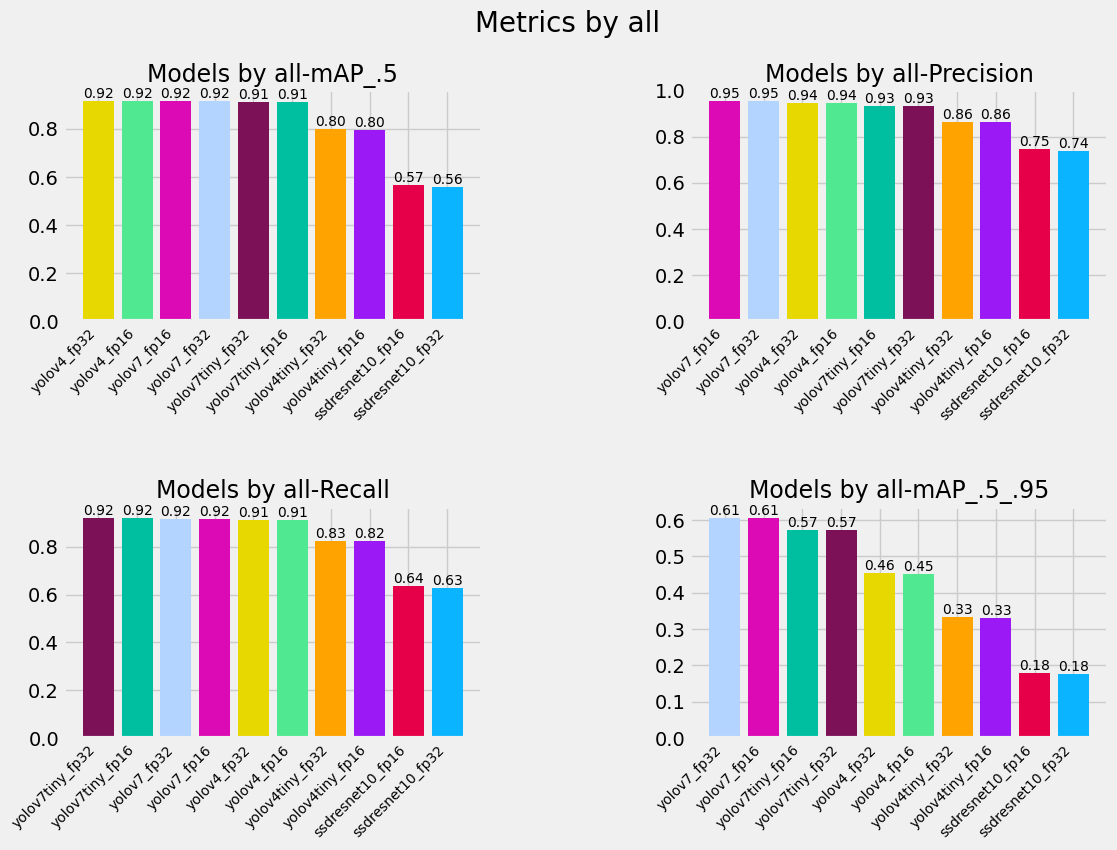

In [180]:
show_subplots("all", show_fps=False)
plt.savefig('metrics_by_all.png', bbox_inches='tight')

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



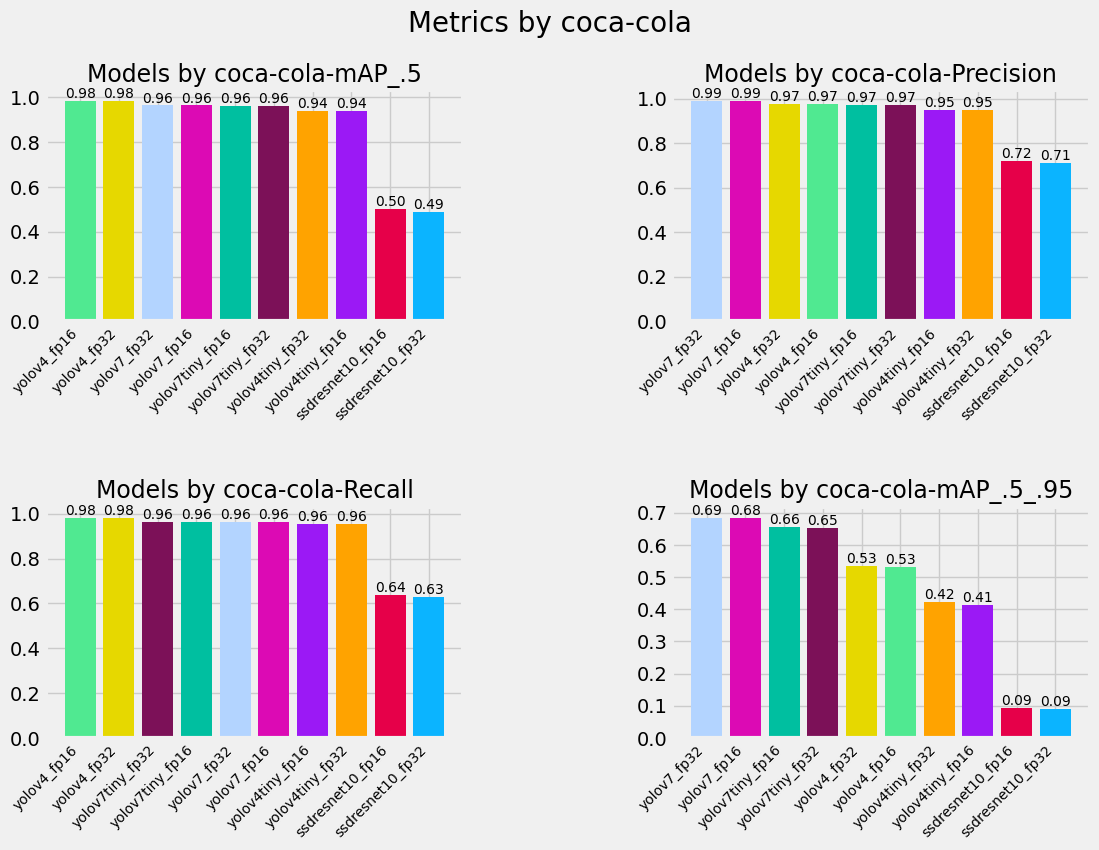

In [182]:
show_subplots("coca-cola")
plt.savefig('metrics_by_coca.png', bbox_inches='tight')

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



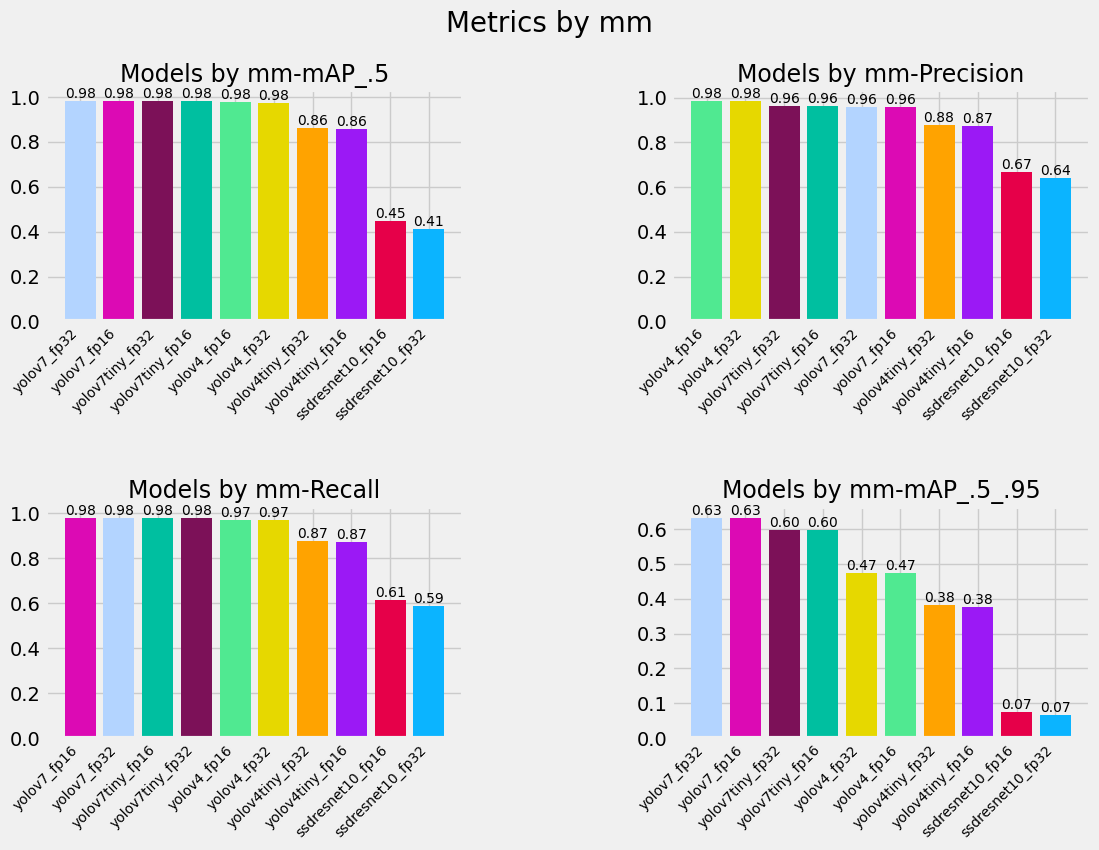

In [183]:
show_subplots("mm")
plt.savefig('metrics_by_mm.png', bbox_inches='tight')

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



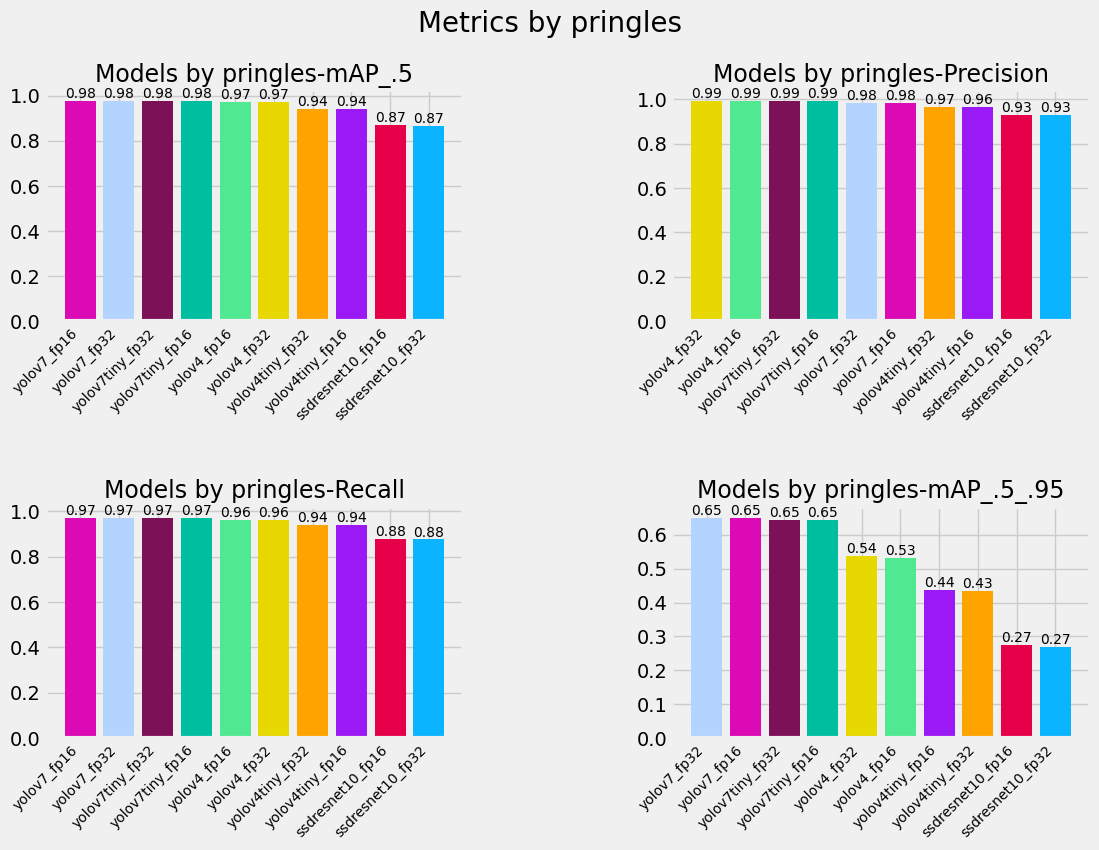

In [184]:
show_subplots("pringles")
plt.savefig('metrics_by_pringles.png', bbox_inches='tight')

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



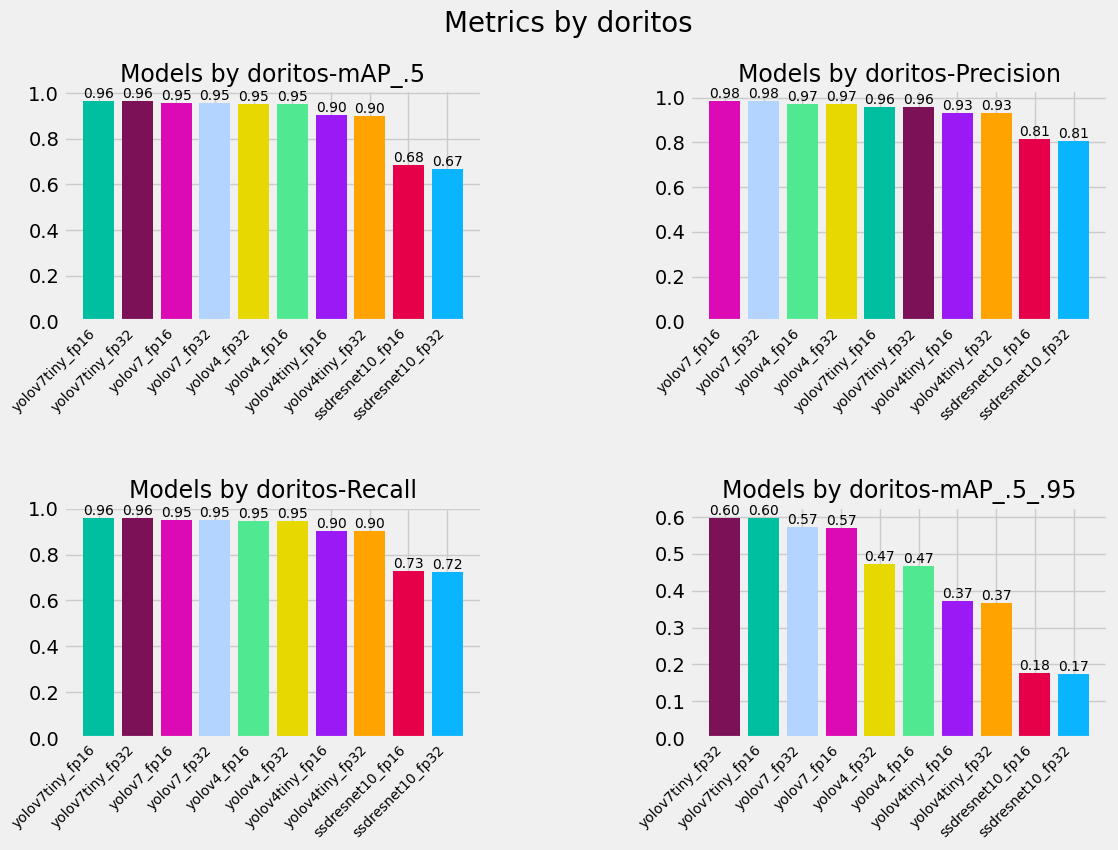

In [185]:
show_subplots("doritos")
plt.savefig('metrics_by_doritos.png', bbox_inches='tight')

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



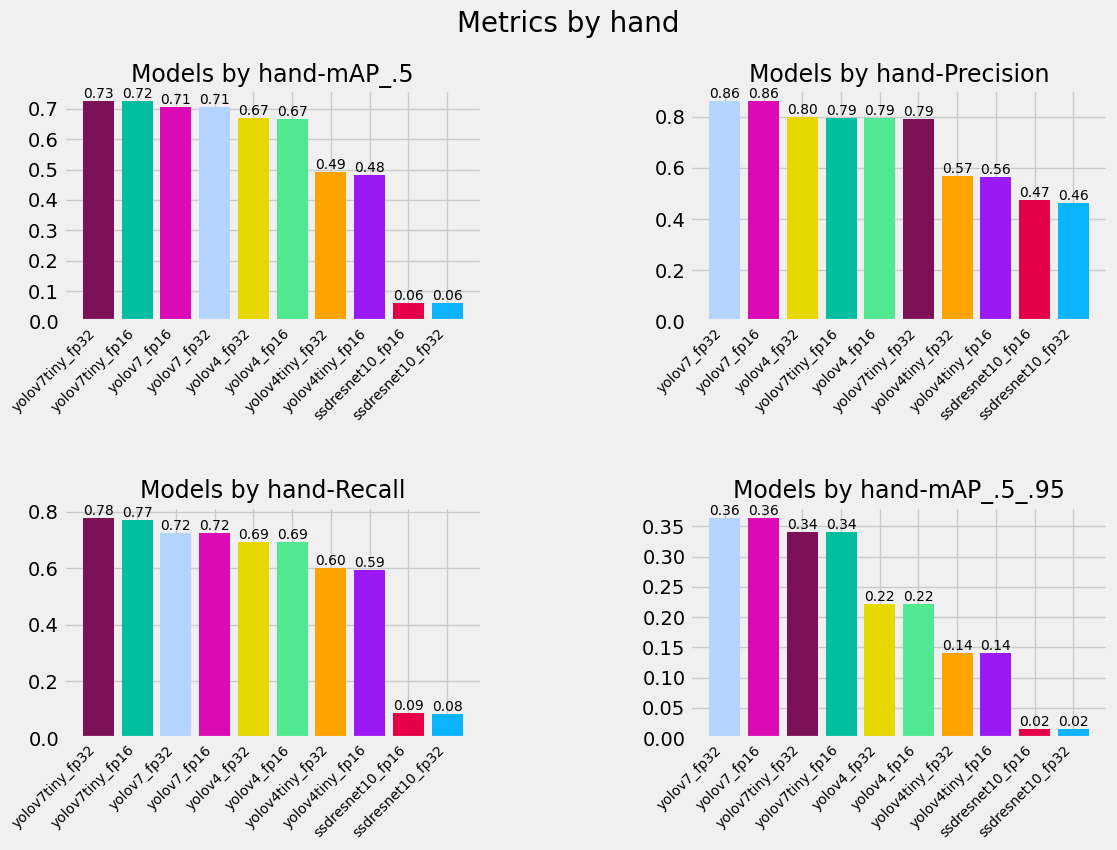

In [186]:
show_subplots("hand")
plt.savefig('metrics_by_hand.png', bbox_inches='tight')

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



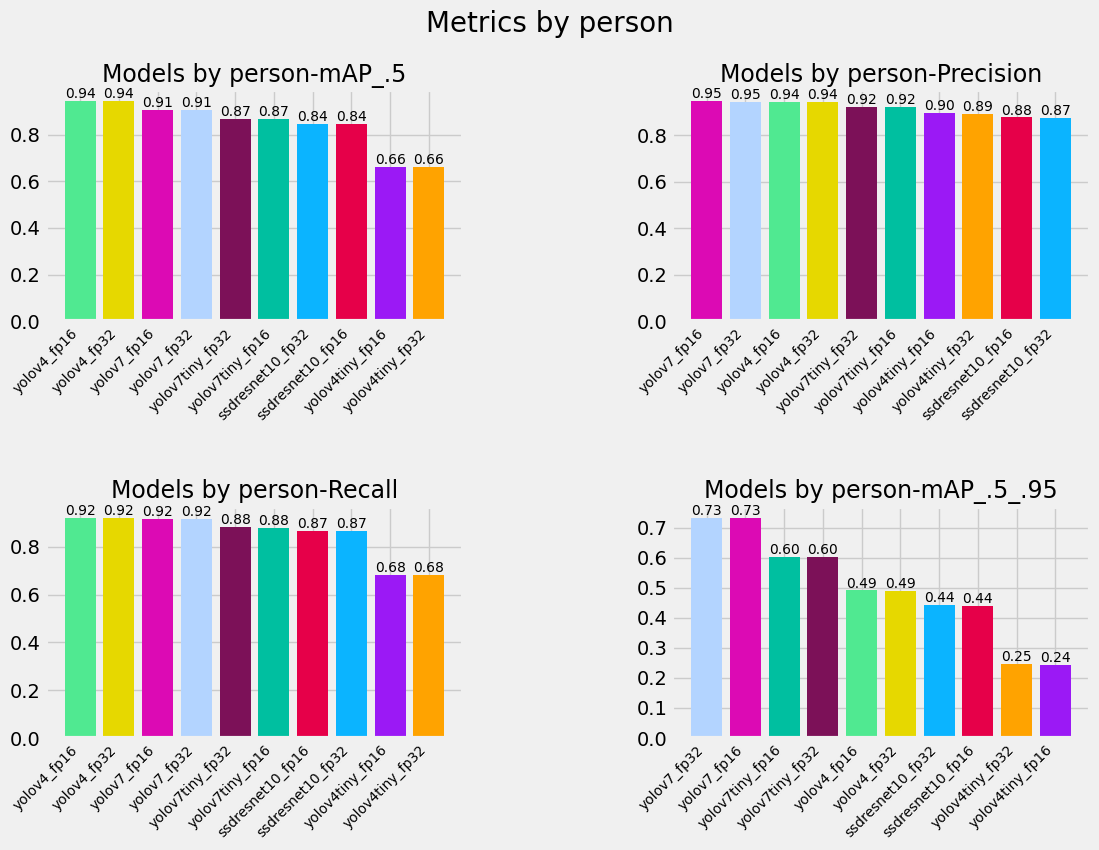

In [187]:
show_subplots("person")
plt.savefig('metrics_by_person.png', bbox_inches='tight')

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\LuisGonzalez\AppData\Local\Temp\ipykernel_2308\1569383824.py:14: UserWarning:

FixedFormatter should only be used together with FixedLocator



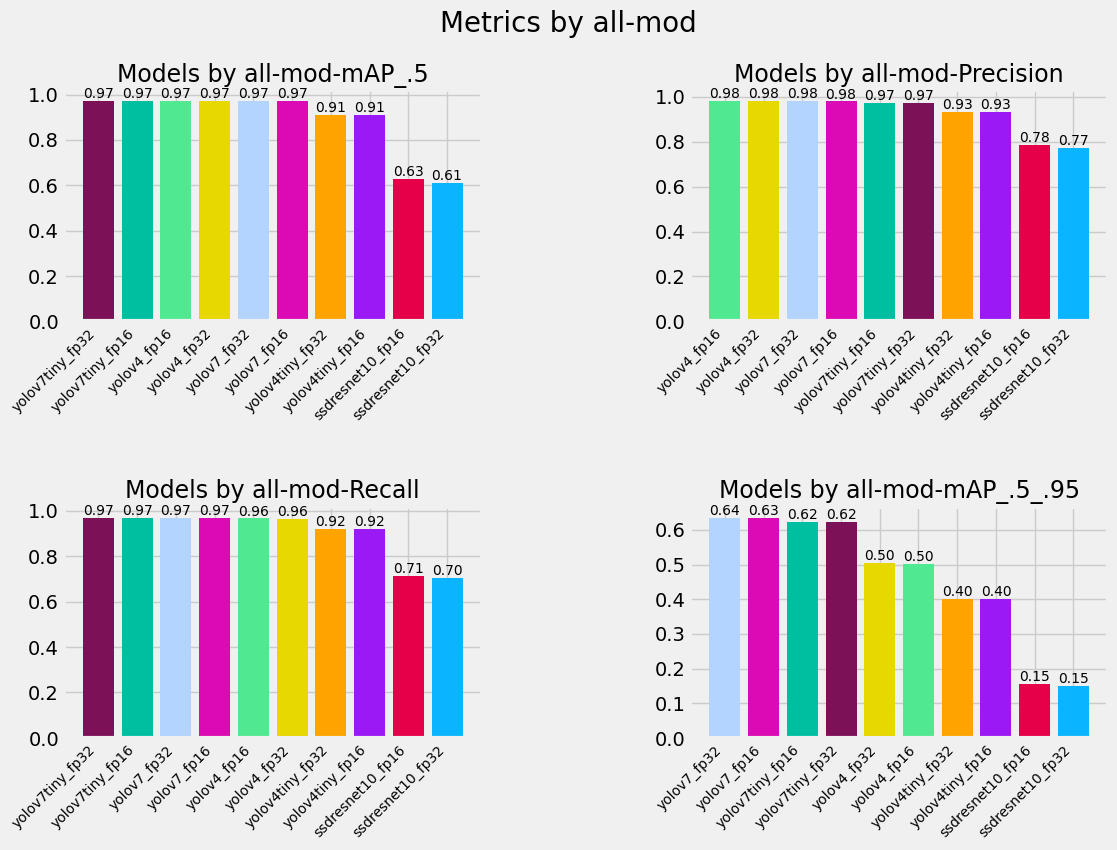

In [188]:
show_subplots("all-mod")
plt.savefig('metrics_by_all_mod.png', bbox_inches='tight')

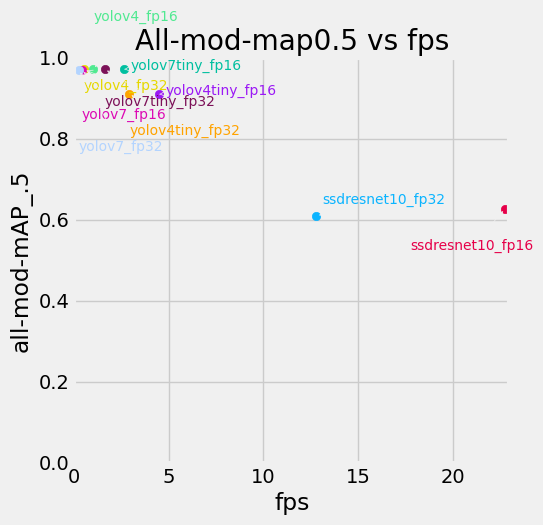

In [201]:
with plt.style.context('fivethirtyeight'):
    # Set the figure size
    plt.figure(figsize=(5, 5))  # Width, height in inches

    # plt.scatter(df_metrics['fps'], df_metrics['all-mAP_.5'])

    # Add labels to specific positions
    def add_point(model, idx, px, py, fontsize=10):
        plt.annotate(model, xy=(df_metrics['fps'][idx], df_metrics['all-mod-mAP_.5'][idx]), xytext=(df_metrics['fps'][idx] + px, df_metrics['all-mod-mAP_.5'][idx] + py),
                     arrowprops=dict(arrowstyle="->"), color=color_dict[model], fontsize=fontsize)
        plt.scatter(df_metrics['fps'][idx], df_metrics['all-mod-mAP_.5'][idx], color=color_dict[model])
    
    add_point(model='ssdresnet10_fp16', idx=0, px=-5, py=-0.1)
    add_point(model='ssdresnet10_fp32', idx=1, px=0.3, py=0.03)
    add_point(model='yolov4_fp16', idx=2, px=0, py=0.12)
    add_point(model='yolov4_fp32', idx=3, px=0, py=-0.05)
    add_point(model='yolov4tiny_fp16', idx=4, px=0.3, py=0)
    add_point(model='yolov4tiny_fp32', idx=5, px=0, py=-0.1)
    add_point(model='yolov7_fp16', idx=6, px=0, py=-0.12)
    add_point(model='yolov7_fp32', idx=7, px=0, py=-0.2)
    add_point(model='yolov7tiny_fp16', idx=8, px=0.3, py=0)
    add_point(model='yolov7tiny_fp32', idx=9, px=0, py=-0.09)


    # Set axis labels
    plt.xlabel('fps')
    plt.ylabel('all-mod-mAP_.5')

    # Set the axis limits
    plt.xlim(0, 23)  # X-axis limits
    plt.ylim(0, 1)  # Y-axis limits
    
    plt.title("All-mod-map0.5 vs fps")
    plt.savefig('MAPmod_vs_fps.png')
    
    # Display the plot
    plt.show()

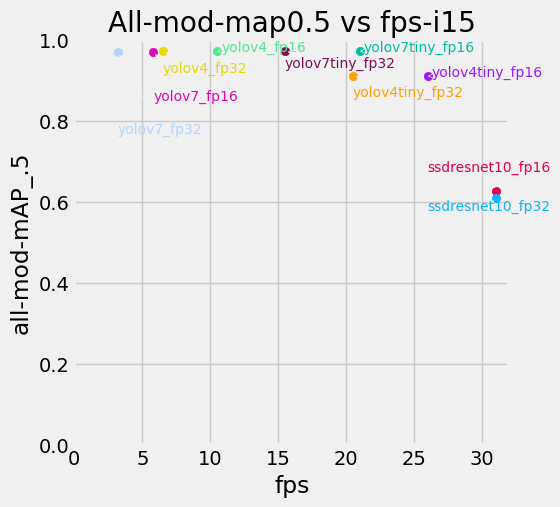

In [229]:
with plt.style.context('fivethirtyeight'):
    # Set the figure size
    plt.figure(figsize=(5, 5))  # Width, height in inches

    # plt.scatter(df_metrics['fps'], df_metrics['all-mAP_.5'])

    # Add labels to specific positions
    def add_point(model, idx, px, py, fontsize=10):
        plt.annotate(model, xy=(df_metrics['fps-i15'][idx], df_metrics['all-mod-mAP_.5'][idx]), xytext=(df_metrics['fps-i15'][idx] + px, df_metrics['all-mod-mAP_.5'][idx] + py),
                     arrowprops=dict(arrowstyle="->"), color=color_dict[model], fontsize=fontsize)
        plt.scatter(df_metrics['fps-i15'][idx], df_metrics['all-mod-mAP_.5'][idx], color=color_dict[model])
    
    add_point(model='ssdresnet10_fp16', idx=0, px=-5, py=0.05)
    add_point(model='ssdresnet10_fp32', idx=1, px=-5, py=-0.03)
    add_point(model='yolov4_fp16', idx=2, px=0.3, py=0.0)
    add_point(model='yolov4_fp32', idx=3, px=0, py=-0.05)
    add_point(model='yolov4tiny_fp16', idx=4, px=0.3, py=0)
    add_point(model='yolov4tiny_fp32', idx=5, px=0, py=-0.05)
    add_point(model='yolov7_fp16', idx=6, px=0, py=-0.12)
    add_point(model='yolov7_fp32', idx=7, px=0, py=-0.2)
    add_point(model='yolov7tiny_fp16', idx=8, px=0.3, py=0)
    add_point(model='yolov7tiny_fp32', idx=9, px=0, py=-0.04)


    # Set axis labels
    plt.xlabel('fps')
    plt.ylabel('all-mod-mAP_.5')

    # Set the axis limits
    plt.xlim(0, 32)  # X-axis limits
    plt.ylim(0, 1)  # Y-axis limits
    
    plt.title("All-mod-map0.5 vs fps-i15")
    plt.savefig('MAPmod_vs_fpsi15.png', bbox_inches='tight')
    
    # Display the plot
    plt.show()